In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os.path as op
%matplotlib inline

In [2]:
dirpath = '/Users/morganfine-morris/Documents/Repos/NMProject/Paper/Data and Analysis/long TB Yan/'
tb_file = 'TB_all_long.csv_Bursts_Results.csv'
yan_file = 'Yan_all_long.csv_Bursts_Results.csv'
tb_file_path = op.join(dirpath, tb_file)
yan_file_path = op.join(dirpath, yan_file)

#remove the rows with nan values and the unnecessary columns
junk_columns = ['Unnamed: 1', 'Burst Start', 'Burst End', 'Edge Event','Peak Amp', 'Peak Time', 'Attack', 'Decay']
tb_bursts = pd.DataFrame.from_csv(tb_file_path)
yan_bursts = pd.DataFrame.from_csv(yan_file_path)
tb_clean = tb_bursts.dropna(axis=0).drop(junk_columns, axis=1) 
yan_clean = yan_bursts.dropna(axis=0).drop(junk_columns, axis=1) 

#add model and parameter info columns
tb_clean['Model'] = "tb"
yan_clean['Model'] = "yan"
tb_clean['ParamSet'] = tb_clean.index
yan_clean['ParamSet'] = yan_clean.index

burst_data = pd.concat([tb_clean,yan_clean],ignore_index=True)
burst_data.head()

,Burst Duration,Interburst Interval,Total Cycle Time,Peaks per Burst,Intraburst Frequency,Model,ParamSet
0,5.513901,1.0138,6.527701,179,32.463407,tb,-50.0eL 1.8gnaps
1,2.564600,1.1615,3.726100,65,25.345080,tb,-50.0eL 1.8gnaps
2,2.564800,1.1639,3.728700,65,25.343104,tb,-50.0eL 1.8gnaps
3,2.564800,1.1642,3.729000,65,25.343104,tb,-50.0eL 1.8gnaps
4,2.564800,1.1642,3.729000,65,25.343104,tb,-50.0eL 1.8gnaps


In [3]:
dirpath = '/Users/morganfine-morris/Documents/Repos/NMProject/Paper/Data and Analysis/long TB Yan/'
tb_file = 'TB_all_long.csv_Peak_Results.csv'
yan_file = 'Yan_all_long.csv_Peak_Results.csv'
tb_file_path = op.join(dirpath, tb_file)
yan_file_path = op.join(dirpath, yan_file)

#remove the rows with nan values and the unnecessary columns
junk_columns = []#['Unnamed: 1', 'Burst Start', 'Burst End', 'Edge Event','Peak Amp', 'Peak Time', 'Attack', 'Decay']
tb_bursts = pd.DataFrame.from_csv(tb_file_path)
yan_bursts = pd.DataFrame.from_csv(yan_file_path)
tb_clean = tb_bursts.dropna(axis=0).drop(junk_columns, axis=1) 
yan_clean = yan_bursts.dropna(axis=0).drop(junk_columns, axis=1) 

#add model and parameter info columns
tb_clean['Model'] = "tb"
yan_clean['Model'] = "yan"
tb_clean['ParamSet'] = [i.replace("=","") for i in tb_clean.index]
yan_clean['ParamSet'] = [i.replace("=","") for i in yan_clean.index]

burst_data = pd.concat([tb_clean,yan_clean],ignore_index=True)
burst_data.head()

,Time,Peaks Amplitude,Intervals,Model,ParamSet
0,0.0319,5.846378,0.0162,tb,-50.0eL 1.8gnaps
1,0.0481,5.667075,0.0163,tb,-50.0eL 1.8gnaps
2,0.0644,5.622115,0.0164,tb,-50.0eL 1.8gnaps
3,0.0808,5.674220,0.0166,tb,-50.0eL 1.8gnaps
4,0.0974,5.538182,0.0167,tb,-50.0eL 1.8gnaps


In [4]:
def split_param_sets(table, column_key, sep=" ", format_string="([a-zA-Z]+)([\-][\d+.\d+]+|[\d+.\d+]+)"):

    import re

    r = re.compile(format_string)
    column = table[column_key]
    param_val_dict = {}
    
    for cell in column:
        name_val_pairs = cell.split(sep)

        for pair in name_val_pairs:
            
            #separate the variable name and its value
            name_val = r.match(pair).groups()
            if name_val is None:
                raise KeyError("Format of parameter name-value sets does not match passed format_string.")
                
            #figure out which is the value and which is the name
            try:
                val = float(name_val[0])
                name = name_val[1]
            except:
                val = float(name_val[1])
                name = name_val[0]
            
            #append the value to the appropriate list or make new entry in dictionary if entry does not exist
            try:
                param_val_dict[name].append(val)
            except KeyError:
                param_val_dict[name] = []
                param_val_dict[name].append(val)
    return pd.DataFrame.from_dict(param_val_dict)

params_frame = split_param_sets(burst_data, 'ParamSet',
                                        format_string="([\-][\d+.\d+]+|[\d+.\d+]+)([a-zA-Z]+)")
params_frame.T.tail()

,0,1,2,3,4,5,6,7,8,9,...,589000,589001,589002,589003,589004,589005,589006,589007,589008,589009
eL,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,...,-65.0,-65.0,-65.0,-65.0,-65.0,-65.0,-65.0,-65.0,-65.0,-65.0
gnaps,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2


In [5]:
reform_burst_data = pd.concat([burst_data,params_frame],axis=1).drop('ParamSet',axis=1)
reform_burst_data.head()

,Time,Peaks Amplitude,Intervals,Model,eL,gnaps
0,0.0319,5.846378,0.0162,tb,-50,1.8
1,0.0481,5.667075,0.0163,tb,-50,1.8
2,0.0644,5.622115,0.0164,tb,-50,1.8
3,0.0808,5.674220,0.0166,tb,-50,1.8
4,0.0974,5.538182,0.0167,tb,-50,1.8


In [8]:
#save
path = op.join(dirpath, "peaks.csv")
print path
#reform_burst_data.to_csv()


/Users/morganfine-morris/Documents/Repos/NMProject/Paper/Data and Analysis/long TB Yan/peaks.csv


In [6]:
grouped_burst_data = reform_burst_data.groupby(by=['Model',"eL","gnaps"])
mean_burst_data = grouped_burst_data.mean()
keys = mean_burst_data.keys().values
list(enumerate(keys))

[(0, 'Time'), (1, 'Peaks Amplitude'), (2, 'Intervals')]

In [6]:
key = keys[0]

In [8]:
tb_clean[key]

-50.0eL 1.8gnaps    5.513901
-50.0eL 1.8gnaps    2.564600
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564700
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564700
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564700
-50.0eL 1.8gnaps    2.564700
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564700
-50.0eL 1.8gnaps    2.564700
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564800
-50.0eL 1.8gnaps    2.564700
-50.0eL 1.8gnaps    2.564700
-50.0eL 1.8gnaps    2.564800
                      ...   
-65.0eL 4.2gnaps    0.624700
-65.0eL 4.2gnaps    0.624700
-65.0eL 4.2gnaps    0.624700
-65.0eL 4.2gna

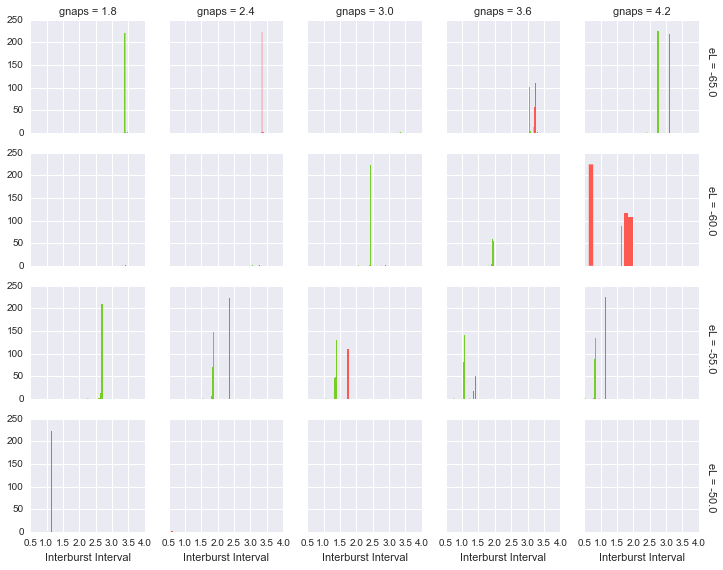

In [10]:
#%matplotlib inline
contrast = sns.xkcd_palette(['coral','apple green'])
sns.set(style="darkgrid")
k = keys[1]
grid = sns.FacetGrid(reform_burst_data,'eL','gnaps','Model',margin_titles=True, legend_out=True,palette=contrast,size=2)
grid.map(plt.hist,k,bins=10,lw=0)
plt.show()

In [12]:
mean_burst_data.hist()
plt.show()
#grouped_burst_data.std()

In [81]:
hist_data_tb = reform_burst_data[reform_burst_data['Model']=='tb']
hist_data_yan = reform_burst_data[reform_burst_data['Model']=='yan']
#hist_data_tb.T.values
#hist_data_yan.T.values
hist_data_tb.head()

,Burst Duration,Interburst Interval,Total Cycle Time,Peaks per Burst,Intraburst Frequency,Model,eL,gnaps
0,5.513901,1.0138,6.527701,179,32.463407,tb,-50,1.8
1,2.564600,1.1615,3.726100,65,25.345080,tb,-50,1.8
2,2.564800,1.1639,3.728700,65,25.343104,tb,-50,1.8
3,2.564800,1.1642,3.729000,65,25.343104,tb,-50,1.8
4,2.564800,1.1642,3.729000,65,25.343104,tb,-50,1.8


In [85]:
key = 'Burst Duration'
for i in hist_data_tb.groupby(['eL','gnaps'])[key]:
    print i

((-65.0, 1.8), 2919    0.1793
2920    0.2959
2921    0.3151
2922    0.3304
2923    0.3266
2924    0.3254
2925    0.3250
2926    0.3249
2927    0.3248
2928    0.3248
2929    0.3248
2930    0.3248
2931    0.3247
2932    0.3247
2933    0.3247
2934    0.3247
2935    0.3247
2936    0.3247
2937    0.3247
2938    0.3248
2939    0.3248
2940    0.3248
2941    0.3248
2942    0.3248
2943    0.3248
2944    0.3248
2945    0.3248
2946    0.3247
2947    0.3247
2948    0.3247
         ...  
3113    0.3248
3114    0.3248
3115    0.3248
3116    0.3248
3117    0.3248
3118    0.3247
3119    0.3247
3120    0.3247
3121    0.3247
3122    0.3247
3123    0.3248
3124    0.3248
3125    0.3248
3126    0.3248
3127    0.3248
3128    0.3248
3129    0.3248
3130    0.3248
3131    0.3248
3132    0.3248
3133    0.3247
3134    0.3247
3135    0.3247
3136    0.3247
3137    0.3248
3138    0.3248
3139    0.3248
3140    0.3248
3141    0.3248
3142    0.3248
Name: Burst Duration, dtype: float64)
((-65.0, 2.3999999999999999), 31

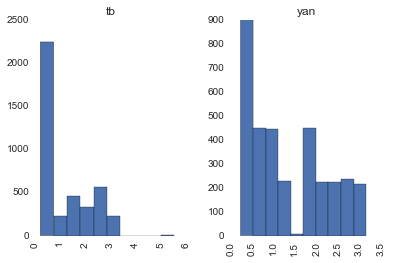

In [30]:
reform_burst_data.hist(column="Burst Duration", by="Model",histtype='barstacked')
plt.show()


In [76]:
key = "Burst Duration"
measures = ["Burst Duration",'Interburst Interval','Total Cycle Time','Peaks per Burst','Intraburst Frequency']
measures.remove(key)

g = reform_burst_data.drop(measures,axis=1).groupby(by=['Model',"eL","gnaps"])
#g.get_group
#pd.DataFrame.hist??
#g.hist?? #(column='Burst Duration',bins=15,stacked=True)
#plt.hist()
g.mean()

Burst Duration
Model eL  gnaps                
tb    -65 1.8          0.323978
          2.4          0.372902
          3.0          0.426848
          3.6          0.503909
          4.2          0.623303
      -60 1.8          0.386805
          2.4          0.472898
          3.0          0.850428
          3.6          1.359737
          4.2          0.592435
      -55 1.8          0.595442
          2.4          1.369534
          3.0          1.972669
          3.6          2.316940
          4.2          2.573251
      -50 1.8          2.577941
          2.4          3.113445
yan   -65 1.8          0.344785
          2.4          0.398038
          3.0          0.456010
          3.6          0.665661
          4.2          0.978537
      -60 1.8          0.387983
          2.4          0.649937
          3.0          1.279889
          3.6          1.784405
          4.2          2.098180
      -55 1.8          1.016945
          2.4          1.866436
          3.0          2.356369
          3.6          2.668142
          4.2          2.888750

In [80]:
s= g['Burst Duration']
s.groups
#s.groups

{('tb', -65.0, 1.8): [2919,
  2920,
  2921,
  2922,
  2923,
  2924,
  2925,
  2926,
  2927,
  2928,
  2929,
  2930,
  2931,
  2932,
  2933,
  2934,
  2935,
  2936,
  2937,
  2938,
  2939,
  2940,
  2941,
  2942,
  2943,
  2944,
  2945,
  2946,
  2947,
  2948,
  2949,
  2950,
  2951,
  2952,
  2953,
  2954,
  2955,
  2956,
  2957,
  2958,
  2959,
  2960,
  2961,
  2962,
  2963,
  2964,
  2965,
  2966,
  2967,
  2968,
  2969,
  2970,
  2971,
  2972,
  2973,
  2974,
  2975,
  2976,
  2977,
  2978,
  2979,
  2980,
  2981,
  2982,
  2983,
  2984,
  2985,
  2986,
  2987,
  2988,
  2989,
  2990,
  2991,
  2992,
  2993,
  2994,
  2995,
  2996,
  2997,
  2998,
  2999,
  3000,
  3001,
  3002,
  3003,
  3004,
  3005,
  3006,
  3007,
  3008,
  3009,
  3010,
  3011,
  3012,
  3013,
  3014,
  3015,
  3016,
  3017,
  3018,
  3019,
  3020,
  3021,
  3022,
  3023,
  3024,
  3025,
  3026,
  3027,
  3028,
  3029,
  3030,
  3031,
  3032,
  3033,
  3034,
  3035,
  3036,
  3037,
  3038,
  3039,
  3040,
  30

In [56]:
g.groups

{('tb', -65.0, 1.8): [2919,
  2920,
  2921,
  2922,
  2923,
  2924,
  2925,
  2926,
  2927,
  2928,
  2929,
  2930,
  2931,
  2932,
  2933,
  2934,
  2935,
  2936,
  2937,
  2938,
  2939,
  2940,
  2941,
  2942,
  2943,
  2944,
  2945,
  2946,
  2947,
  2948,
  2949,
  2950,
  2951,
  2952,
  2953,
  2954,
  2955,
  2956,
  2957,
  2958,
  2959,
  2960,
  2961,
  2962,
  2963,
  2964,
  2965,
  2966,
  2967,
  2968,
  2969,
  2970,
  2971,
  2972,
  2973,
  2974,
  2975,
  2976,
  2977,
  2978,
  2979,
  2980,
  2981,
  2982,
  2983,
  2984,
  2985,
  2986,
  2987,
  2988,
  2989,
  2990,
  2991,
  2992,
  2993,
  2994,
  2995,
  2996,
  2997,
  2998,
  2999,
  3000,
  3001,
  3002,
  3003,
  3004,
  3005,
  3006,
  3007,
  3008,
  3009,
  3010,
  3011,
  3012,
  3013,
  3014,
  3015,
  3016,
  3017,
  3018,
  3019,
  3020,
  3021,
  3022,
  3023,
  3024,
  3025,
  3026,
  3027,
  3028,
  3029,
  3030,
  3031,
  3032,
  3033,
  3034,
  3035,
  3036,
  3037,
  3038,
  3039,
  3040,
  30

In [51]:
g.groups.keys()

[('yan', -65.0, 4.2),
 ('yan', -55.0, 4.2),
 ('tb', -60.0, 2.4),
 ('yan', -60.0, 3.6),
 ('tb', -65.0, 2.4),
 ('tb', -60.0, 3.6),
 ('yan', -65.0, 1.8),
 ('tb', -55.0, 2.4),
 ('tb', -60.0, 3.0),
 ('tb', -50.0, 1.8),
 ('yan', -55.0, 2.4),
 ('yan', -60.0, 3.0),
 ('tb', -60.0, 4.2),
 ('yan', -60.0, 2.4),
 ('yan', -55.0, 3.0),
 ('yan', -65.0, 3.0),
 ('yan', -60.0, 1.8),
 ('tb', -65.0, 3.6),
 ('yan', -65.0, 3.6),
 ('yan', -55.0, 1.8),
 ('tb', -55.0, 4.2),
 ('yan', -55.0, 3.6),
 ('yan', -65.0, 2.4),
 ('tb', -50.0, 2.4),
 ('tb', -55.0, 1.8),
 ('tb', -55.0, 3.6),
 ('tb', -65.0, 4.2),
 ('yan', -60.0, 4.2),
 ('tb', -60.0, 1.8),
 ('tb', -55.0, 3.0),
 ('tb', -65.0, 1.8),
 ('tb', -65.0, 3.0)]

In [54]:
g.get_group(('tb', -65.0, 3.0))



,Burst Duration,Interburst Interval,Total Cycle Time,Peaks per Burst,Intraburst Frequency,Model,eL,gnaps
3367,0.3324,3.3807,3.713100,25,75.210567,tb,-65,3
3368,0.4122,3.3120,3.724200,39,94.614265,tb,-65,3
3369,0.4555,3.2728,3.728301,42,92.206346,tb,-65,3
3370,0.4342,3.2945,3.728700,42,96.729618,tb,-65,3
3371,0.4294,3.2995,3.728900,42,97.810876,tb,-65,3
3372,0.4279,3.3010,3.728900,42,98.153774,tb,-65,3
3373,0.4274,3.3016,3.729000,42,98.268578,tb,-65,3
3374,0.4273,3.3017,3.729001,42,98.291575,tb,-65,3
3375,0.4272,3.3019,3.729100,42,98.314607,tb,-65,3
3376,0.4271,3.3019,3.729001,42,98.337603,tb,-65,3


[[-0.85320872 -1.90130308 -0.56850862]
 [ 1.65573222 -0.80203326 -1.36903169]
 [-1.20528474  1.72456822 -0.42083672]
 ..., 
 [ 0.48925205  0.62122089 -1.31267313]
 [-0.02558358  1.18879627 -2.34737177]
 [-0.51651989  1.46526214 -0.27412384]]


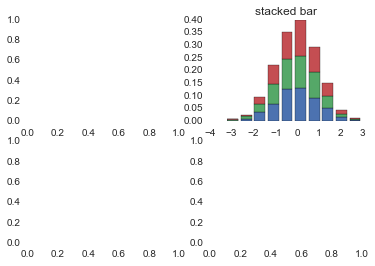

In [45]:
import numpy as np
n_bins = 10
x = np.random.randn(1000, 3)
print x
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

#Make Tidy DataFrames

In [ ]:
import pandas as pd
import os
import os.path as path
import re
import numpy as np

"""
def convert_df_to_tidy_format(df):
    import re
    r1 = re.compile("([\-][\d+.\d+]+|[\d+.\d+]+)([a-zA-Z]+)")
    r2 = re.compile("([a-zA-Z]+)([\-][\d+.\d+]+|[\d+.\d+]+)")

    set11 = []
    set12 = []
    set21 = []
    set22 = []
    for i in df.index:
        pset1, pset2 = [ii.strip() for ii in i.split('vs')]

        n11, n12 = re.findall('([a-zA-Z]+)',pset1)
        p11,p12 =  re.findall('([\-][\d+.\d+]+|[\d+.\d+]+)',pset1)
        n21, n22 = re.findall('([a-zA-Z]+)',pset2)
        p21,p22 =  re.findall('([\-][\d+.\d+]+|[\d+.\d+]+)',pset2)

        #print pset1
        #print pset2
        set11.append(p11)
        set12.append(p12)
        set21.append(p21)
        set22.append(p22)

    df['eL1'] = set11
    df['gnap1'] = set12
    df['eL2'] = set21
    df['gnap2'] = set22
    df['ind'] = range(len(df1))
    df.set_index(keys='ind', inplace=True)
"""

def split_funct(element):
    """
    element is a string of a specific format:
    <str><float> vs <str><float>
    which is to be split 
    """
    pset1, pset2 = [ii.strip() for ii in element.split('vs')]

    #n11, n12 = re.findall('([a-zA-Z]+)',pset1)
    p11,p12 =  re.findall('([\-][\d+.\d+]+|[\d+.\d+]+)',pset1)
    p21,p22 =  re.findall('([\-][\d+.\d+]+|[\d+.\d+]+)',pset2)
    return p11,p12,p21,p22


def convert_df_to_tidy_format(df, splitter, column, new_cols):
    """
    say I have a df and I have a column containing strings with multiple pieces of information
    and I want each of these pieces to go into their own columns
    
    column could be df.index, or a column in the dataframe
    
    hasn't been tested with mutliindexes, so don't try it.
    """
    
    # add the new cols to the dataframe
    for newcol in new_cols:
        df[newcol] = ''
    
    # get items from the column using the splitter function
    all_items = []
    for i in column:
        #print i
        items = splitter(i)
        #print items
        all_items.append(items)
    
    # regroup items so that they are in the proper format 
    # to be added to the new columns
    # NOTE TO SELF: prob need to check to see if each group in grouped_items is same length
    grouped_items = zip(*all_items) 
    if len(new_cols) != len(grouped_items):
        raise Exception("The number of columns passed ({}: {}) does not equal the number of groups "
                        "returned by the splitter function ({}).".format(len(new_cols), new_cols, len(grouped_items)))
    
    # add column vals to each new col
    for col, col_vals in zip(new_cols, grouped_items):
        df[col] = col_vals
    
    return df

def reindex_df(df, new_index):
    """
    new_index should contain a dict of the form:
    {"index_name":[sequence of new values for index]}
    """
    try:
        for key in new_index.keys():
            df[key] = new_index[key]
        return df.set_index(keys=new_index.keys())
    except:
        return df
    
def convert_all_to_tidy(files):
    for choice in files:
        df = pd.DataFrame.from_csv(path.join(prism_out_dir,choice))

        df = convert_df_to_tidy_format(df, split_funct, df.index ,['e1','g1','e2','g2'])
        df = reindex_df(df, {'n':range(len(df))})

##Load Files

In [40]:
prism_out_dir = "/Users/morganfine-morris/Documents/Repos/NMProject/Paper/Data and Analysis/short TB Yan/Prism Output"
files = [i for i in os.listdir(prism_out_dir) if "ANOVA" not in i]
param_comp_files = [i for i in files if "param" in i]
list(enumerate(files))

[(0, 'model_comparison_Burst Duration.csv'),
 (1, 'model_comparison_Interburst Interval.csv'),
 (2, 'model_comparison_Intraburst Freq.csv'),
 (3, 'model_comparison_Peaks Amplitude.csv'),
 (4, 'model_comparison_Peaks Interval.csv'),
 (5, 'model_comparison_Peaks per Burst.csv'),
 (6, 'model_comparison_Total Cycle Time.csv'),
 (7, 'param_comparison_Burst Duration.csv'),
 (8, 'param_comparison_Interburst Interval.csv'),
 (9, 'param_comparison_Intraburst Freq.csv'),
 (10, 'param_comparison_Peaks Amplitude.csv'),
 (11, 'param_comparison_Peaks Interval.csv'),
 (12, 'param_comparison_Peaks per Burst.csv'),
 (13, 'param_comparison_Total Cycle Time.csv')]

In [79]:
choice = files[7]
df = pd.DataFrame.from_csv(path.join(prism_out_dir,choice))
df.head(2)

,TB,Yan,TB p,Yan p,TB sig,Yan sig
eL-50.0 gnaps1.8 vs eL-50.0 gnaps2.4,35.51,0.00,2.378579e-70,1.000000e+00,True,False
eL-50.0 gnaps1.8 vs eL-55.0 gnaps1.8,134.60,10.64,9.916850e-146,1.412569e-19,True,True


##Convert

In [80]:
try:
    df = convert_df_to_tidy_format(df, split_funct, df.index ,['e1','g1','e2','g2'])
    df = reindex_df(df, {'n':range(len(df))})
except:
    print "Already done."
df.columns.values

array(['TB', 'Yan', 'TB p', 'Yan p', 'TB sig', 'Yan sig', 'e1', 'g1', 'e2',
       'g2'], dtype=object)

In [81]:
df_reordered= df[['e1', 'g1', 'e2','g2', 'TB', 'Yan', 'TB p', 'Yan p', 'TB sig', 'Yan sig']]
df_sig_only = df_reordered.drop(['TB', 'Yan', 'TB p', 'Yan p'],axis=1).replace([False, True, np.nan], ['ns', '*', ' '])
df_sig_only#.reset_index()

,e1,g1,e2,g2,TB sig,Yan sig
n,,,,,,
0,-50.0,1.8,-50.0,2.4,*,ns
1,-50.0,1.8,-55.0,1.8,*,*
2,-50.0,1.8,-55.0,2.4,*,*
3,-50.0,1.8,-55.0,3.0,*,*
4,-50.0,1.8,-55.0,3.6,*,*
5,-50.0,1.8,-55.0,4.2,ns,*
6,-50.0,1.8,-60.0,1.8,*,*
7,-50.0,1.8,-60.0,2.4,*,*
8,-50.0,1.8,-60.0,3.0,*,*


In [87]:
g_by_e1 = df_sig_only.groupby('e1')
g_by_e1.groups.keys()
g55 = g_by_e1.get_group('-55.0')
g55[g55['Yan sig'] == '*' and (g55['TB sig'] == '*')]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
grouped_by_2 = df.groupby('g2')
for i in grouped_by_2.groups.keys():
    print grouped_by_2.get_group(i).head()